In [178]:
# import packages, check folders
#%reset
from pathlib import Path
import os
import numpy as np
import h5py
import pandas as pd
#import imagesc as imagesc #pip install imagesc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
import pickle

%matplotlib inline

working_dir = '/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code'
#working_dir = os.getcwd()
print('current directory:\n',working_dir)
path = Path(working_dir)
parent_folder = path.parent
#print('parent folder:', parent_folder)
data_file_loc = os.path.join(parent_folder,'data') # to store data we extract later in this notebook

current directory:
 /Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code


In [179]:
# setting default fontsizes for plots

s=16 # CHANGE FONTSIZE HERE
plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend
plt.rcParams['savefig.facecolor']='white'
#import matplotlib as mpl
#mpl.rcParams['font.weight']= 'normal'


In [180]:
# get the right red/blue shades
#red_rgb = [103,0,31] # edges of RdBu
#blue_rgb = [5,48,97] # edges of RdBu
red_rgb =[188,61,62] # from Emily
blue_rgb = [54,122,177] # from Emily
red_rgb = np.array(red_rgb)/255
blue_rgb = np.array(blue_rgb)/255
alpha = .2 # transparency inside boxplots, for datapts etc.

In [181]:
# vid names as saved in behavioral data
vidnames = ["COAXING-B", "BILLIARD-A", "DRIFTING-A", "Fishing", "Random mechanical", 
            "Scaring", "SEDUCING-B", "STAR-A", "SURPRISING-B", "TENNIS-A"]

In [182]:
#loading shen atlas labels
pd.set_option('display.max_colwidth', None) # so columns are not snipped
# loading the Shen atlas labels
shen268_lbl = pd.read_csv(os.path.join(data_file_loc,"shen_dictionary.csv"))
shen268_lbl.head()
# to print an ROI: eval(shen268[str(insert ROI val between 1-268)][0])['name']

,1,2,3,4,5,6,7,8,9,10,...,259,260,261,262,263,264,265,266,267,268
0,"{'coords': [14.083200000000005, 56.6944, -16.684799999999996], 'name': '92.80% Frontal_Pole; 7.20% Frontal_Medial_Cortex'}","{'coords': [9.599999999999994, 17.61882352941177, -19.53411764705882], 'name': '60.56% Subcallosal_Cortex; 38.73% Frontal_Orbital_Cortex'}","{'coords': [5.270633397312864, 35.03262955854126, -17.5278310940499], 'name': '58.54% Frontal_Medial_Cortex; 34.55% Subcallosal_Cortex'}","{'coords': [15.647840531561457, 34.18604651162792, -22.544850498338867], 'name': '54.15% Frontal_Pole; 41.86% Frontal_Orbital_Cortex'}","{'coords': [8.283887468030684, 46.05882352941177, -1.6700767263427139], 'name': '47.25% Paracingulate_Gyrus; 25.03% Cingulate_Gyrus_anterior_division; 16.35% Frontal_Medial_Cortex; 10.86% Frontal_Pole'}","{'coords': [14.581460674157299, 64.75280898876406, 3.682584269662925], 'name': '100.00% Frontal_Pole'}","{'coords': [30.41914191419142, 54.79537953795381, -3.3267326732673297], 'name': '100.00% Frontal_Pole'}","{'coords': [44.469325153374236, 46.095092024539866, -4.917177914110425], 'name': '99.85% Frontal_Pole'}","{'coords': [28.814814814814817, 51.163163163163176, 18.73473473473473], 'name': '100.00% Frontal_Pole'}","{'coords': [8.521081081081078, 53.28, 23.885405405405407], 'name': '48.54% Frontal_Pole; 32.43% Paracingulate_Gyrus; 19.03% Superior_Frontal_Gyrus'}",...,"{'coords': [-10.399527186761233, 10.877068557919614, -8.056737588652481], 'name': '20.66% Subcallosal_Cortex; 19.95% Left_Putamen; 19.83% Left_Accumbens; 14.40% Left_Caudate; 13.81% no_label; 5.67% Frontal_Orbital_Cortex'}","{'coords': [-14.491582491582491, -3.54882154882155, 20.909090909090907], 'name': '55.03% Left_Caudate; 29.53% Left_Lateral_Ventrical; 11.07% Left_Thalamus'}","{'coords': [-24.77079107505071, 5.537525354969574, -0.07302231237322587], 'name': '96.96% Left_Putamen'}","{'coords': [-9.427230046948353, -25.539906103286384, -1.3755868544600958], 'name': '72.56% Left_Thalamus; 21.40% Brain-Stem; 5.58% no_label'}","{'coords': [-4.68474576271187, -10.2406779661017, 5.877966101694909], 'name': '82.71% Left_Thalamus; 13.90% Left_Lateral_Ventrical'}","{'coords': [-11.407792207792212, -25.563636363636363, 14.883116883116884], 'name': '61.82% Left_Thalamus; 31.43% Left_Lateral_Ventrical'}","{'coords': [-4.821052631578951, -21.51157894736842, -15.890526315789472], 'name': '71.16% Brain-Stem; 25.89% no_label'}","{'coords': [-4.227272727272734, -37.89772727272728, -53.26704545454545], 'name': '100.00% Brain-Stem'}","{'coords': [-6.9375, -33.13068181818181, -39.34659090909091], 'name': '99.15% Brain-Stem'}","{'coords': [-5.697885196374628, -18.966767371601208, -36.81570996978852], 'name': '100.00% Brain-Stem'}"


In [183]:
# load responses (nsubs * nmovies, values 0 for "no", 1 for "yes", "9" for unsure )
responses = np.load(os.path.join(data_file_loc,'responses.npy'))
responses[0,:]

array([nan,  0.,  1., nan, nan,  1.,  1.,  0.,  1.,  9.])

In [184]:
# save responses as texts with "Social", "Nonsocial" and "Neither" (so only for social v. non social comparisons) - useful for LMEs
responses_txt = []
for m in range(10):
    temp_txt = []
    temp = responses[:,m]
    for t in temp:
        if ~np.isnan(t):
            if int(t) == 1:
                temp_txt.append('Social')
            elif int(t) == 0:
                temp_txt.append('Nonsocial')
            else:
                temp_txt.append('Unsure')    
        else:
            temp_txt.append('Neither')
    responses_txt.append(temp_txt) # list of 10, each item has 1048 elements

In [185]:
tr0_ind = 3 # ind at which tr=0 starts
[timepts_indiv_movie,vid_start_rel_tr] = np.load(os.path.join(data_file_loc,'Video_TRs.npy'),allow_pickle=True)
tr_compensate = 1 
print(vid_start_rel_tr) #  not reducing index by 1 for this because doing a GLM
l_task = 28

[7 14 14 14 14 7 14 14 14 14]


In [9]:
'''def remove_pretrial_TRs(tcs,vid_start_rel_tr,pretrial_TRs):
    # remove unnecessary BOLD timepts (everything not in the range [-3:28])
    tcs1 = np.empty((tcs.shape[0],tcs.shape[1],28+pretrial_TRs,tcs.shape[3]))
    tcs1[:] = np.nan
    for vid_no in range(10):
        tr0 = vid_start_rel_tr[vid_no]
        tcs1[:,:,:,vid_no] = tcs[:,:,tr0-pretrial_TRs:tr0+28,vid_no] # 31 timepts
    return tcs1'''

#select subs who responded "Social" to the yes movie and "Non-social" to the no movie
print('\nrun-wise norm data.')
fileName = os.path.join(data_file_loc,'timecourses_run_norm','timecourse-all-movies_zscorenorm.npy') # load fmri data
tcs_run_z = np.load(fileName) # nsubs * nnodes * ntimepts *nmovies

#print('before:',tcs_run_z.shape)
#tcs_run_z = remove_pretrial_TRs(tcs_run_z,vid_start_rel_tr,tr0_ind)
#print('after:',tcs_run_z.shape)


run-wise norm data.


In [10]:
[timepts_indiv_movie,vid_start_rel_tr] = np.load(os.path.join(data_file_loc,'Video_TRs.npy'),allow_pickle=True) 
vid_start_rel_tr 

array([7, 14, 14, 14, 14, 7, 14, 14, 14, 14], dtype=object)

In [12]:
import time
from joblib import cpu_count
#from pymer4.models import Lmer,Lm
#from multiprocessing import Pool
from sklearn.linear_model import LinearRegression
from joblib import Parallel,delayed

[[-1.10456366e-05  2.83694934e-01]]
[[-0.01643473 -0.01643473]]
[[-1.10456366e-05  2.83694934e-01]]


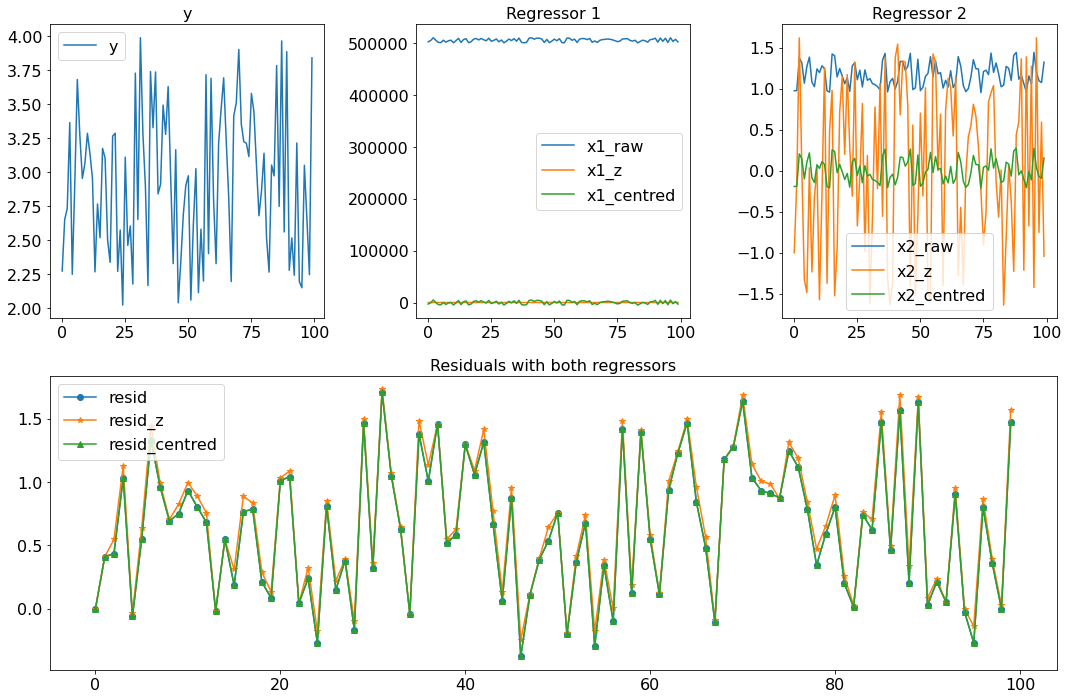

In [13]:
plt.figure(1,figsize=(15,10))
plt.subplot(231)
y =  np.random.rand(100,1)*2+ 2
plt.plot(y,label='y')
plt.legend()
plt.title('y')

plt.subplot(232)
x = np.random.rand(100,1)*10000+ 500000
plt.plot(x,label='x1_raw')
x_z = stats.zscore(x)
plt.plot(x_z,label='x1_z')
x_scale = x - x.mean()
plt.plot(x_scale, label='x1_centred')
plt.legend()
plt.title('Regressor 1')


plt.subplot(233)
x2 = np.random.rand(100,1)*.5+ .95
plt.plot(x2,label='x2_raw')
x2_z = stats.zscore(x)
plt.plot(x2_z,label='x2_z')
x2_scale = x2 - x2.mean()
plt.plot(x2_scale, label='x2_centred')
plt.legend()
plt.title('Regressor 2')

plt.subplot(212)
reg = np.array([x,x2]).squeeze().T
model1 = LinearRegression().fit(reg, y)
print(model1.coef_)
resid = y-model1.predict(reg)
plt.plot(resid- resid[0], marker= 'o', label = 'resid')
#print(resid_scale-resid_scale[0])

reg_z = np.array([x_z,x2_z]).squeeze().T
model2 = LinearRegression().fit(reg_z, y)
print(model2.coef_)
resid_z = y-model2.predict(reg_z)
plt.plot(resid_z-resid_z[0], marker= '*', label = 'resid_z')
#print(resid_scale-resid_scale[0])

reg_scale = np.array([x_scale,x2_scale]).squeeze().T
model3 = LinearRegression().fit(reg_scale, y)
print(model3.coef_)
resid_scale = y-model3.predict(reg_scale)
plt.plot(resid_scale-resid_scale[0],marker= '^', label = 'resid_centred')
#print(resid_scale-resid_scale[0])
plt.legend()
plt.title('Residuals with both regressors')

plt.tight_layout()

(31, 10)


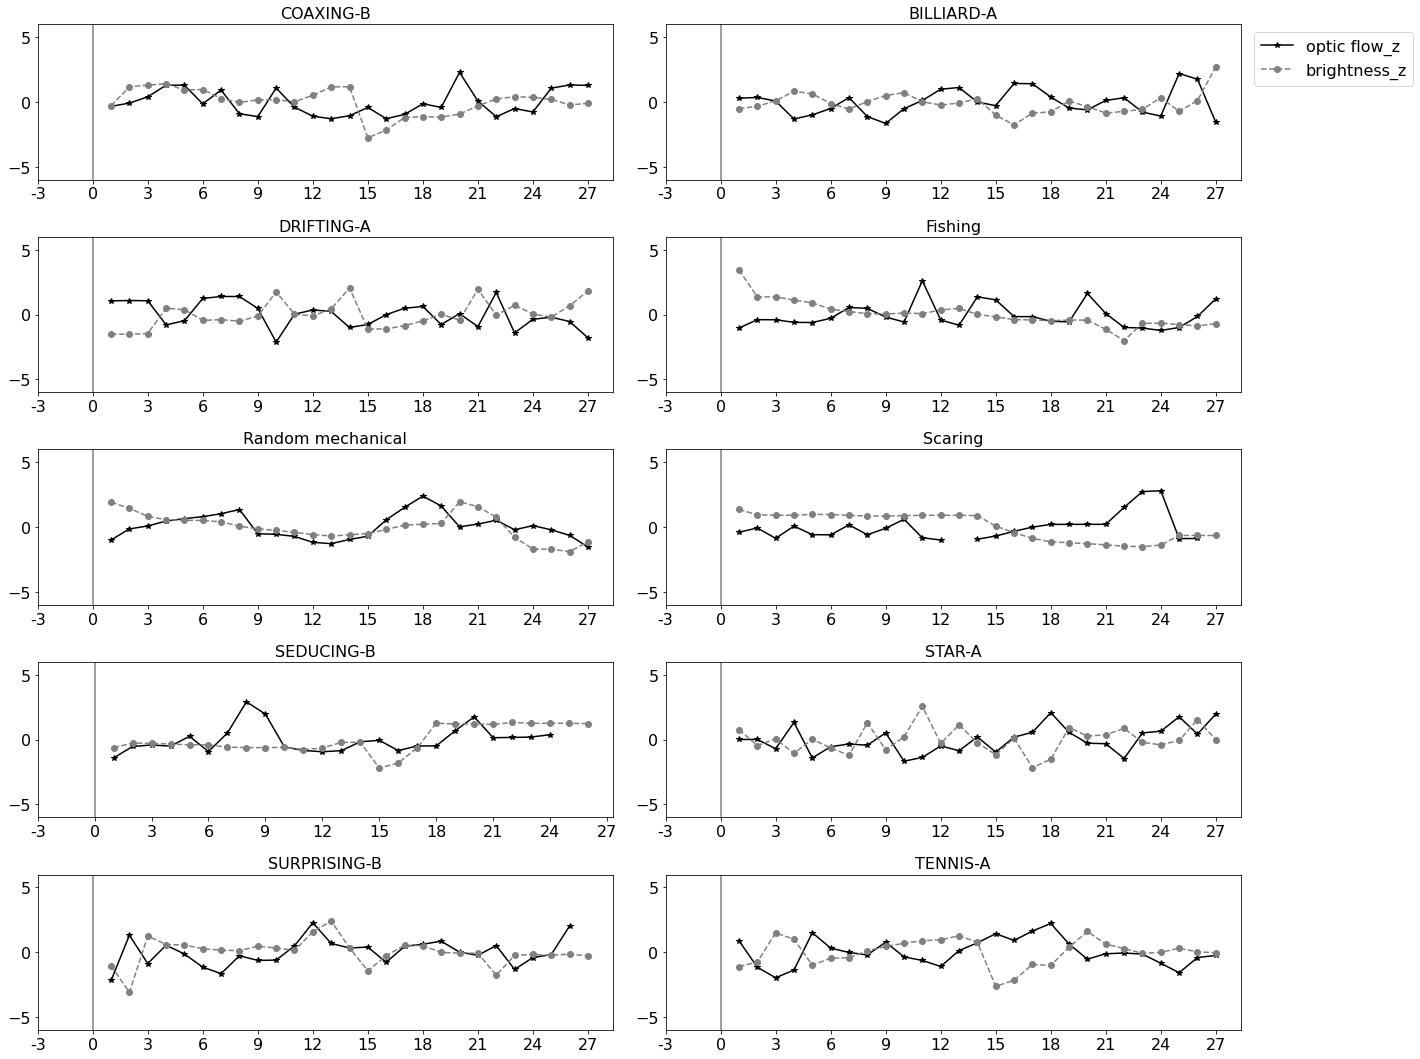

In [14]:
z_score = 1 # change to 1 to get z-scored values
# load low-level properties timecourses
if z_score==1:
    brightness_reg_1 = np.load('brightness_reg_all_z.npy')
    of_reg_1 = np.load('optic_flow_reg_all_z.npy')
else:
    brightness_reg_1 = np.load('brightness_reg_all.npy')
    of_reg_1 = np.load('optic_flow_reg_all.npy')

#brightness_reg_1 -= brightness_reg_1[tr0_ind] #  wrong to baseline-correct this. 
#of_reg_1 -= of_reg_1[tr0_ind]

# if the first fmri TR is BEFORE t=0, push low-level regs to a later TR
if tr_compensate==1:
    of_reg, brightness_reg = [np.empty((31,10)) for _ in range(2)]
    of_reg[:], brightness_reg[:] = [np.nan]*2
    of_reg[1:,:] = of_reg_1[:-1,:]
    brightness_reg[1:,:] = brightness_reg_1[:-1,:]
else:
    of_reg,brightness_reg = of_reg_1,brightness_reg_1

print(of_reg.shape)

plt.figure(1,figsize=(20,15))
for i,m in enumerate(np.arange(0,10)):
    plt.subplot(5,2,i+1)
    plt.ylim(-6,6)
    plt.plot(of_reg[:,m],color='k',label='optic flow_z',marker = '*')
    plt.plot(brightness_reg[:,m],color='grey',ls='dashed', label='brightness_z',marker='o')
    plt.vlines(tr0_ind,plt.ylim()[0],plt.ylim()[1],color='grey')
    plt.title(vidnames[m])
    xticks = np.arange(0,32,3)
    plt.xticks(xticks,[str(i-tr0_ind) for i in xticks])
    if i==1:
        plt.legend(bbox_to_anchor=[1.01,1])

plt.tight_layout()

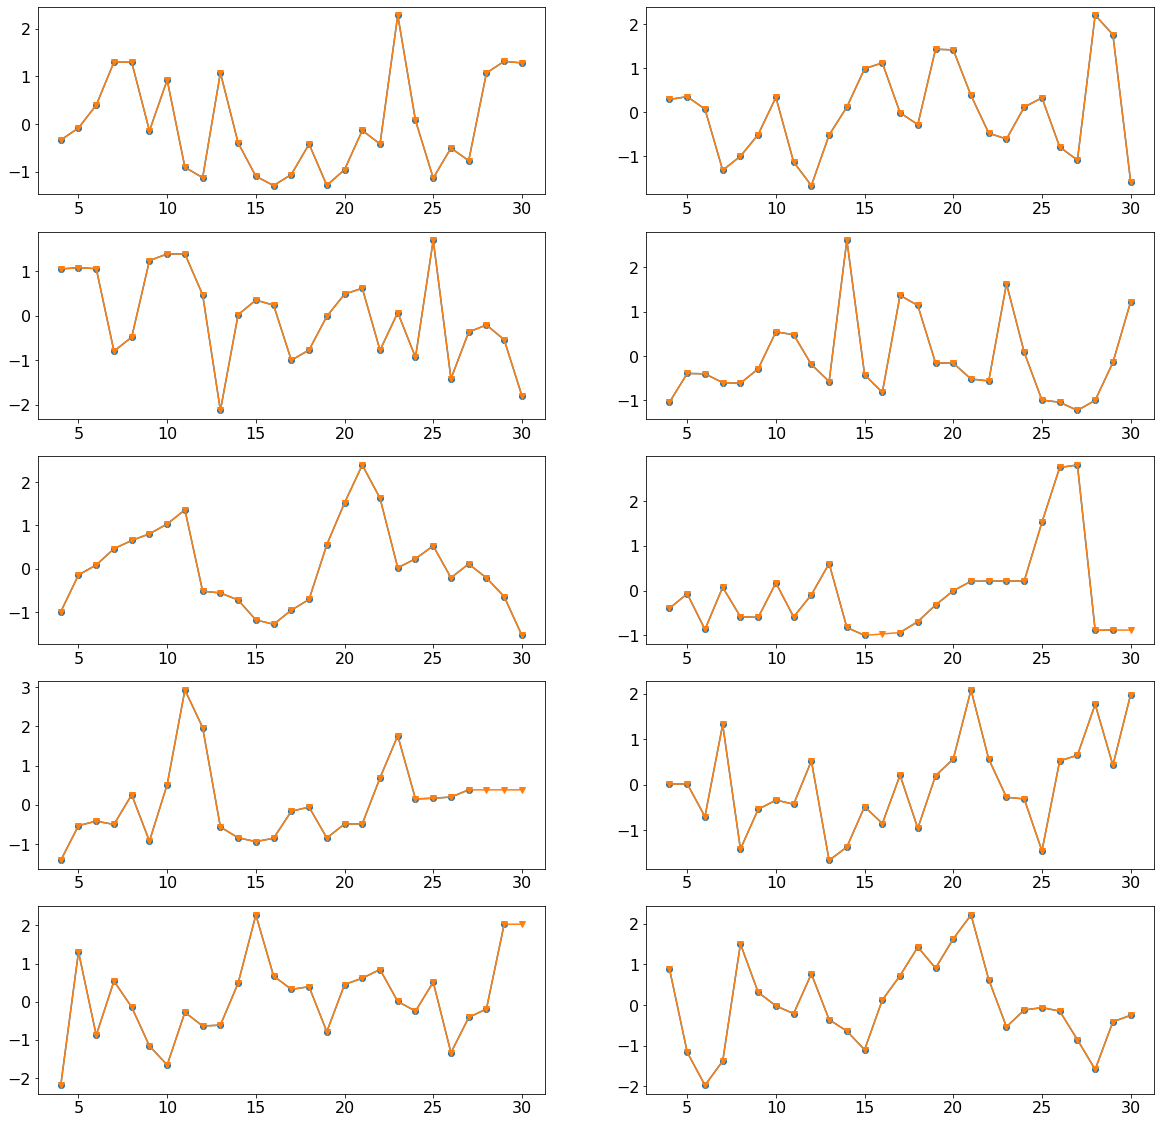

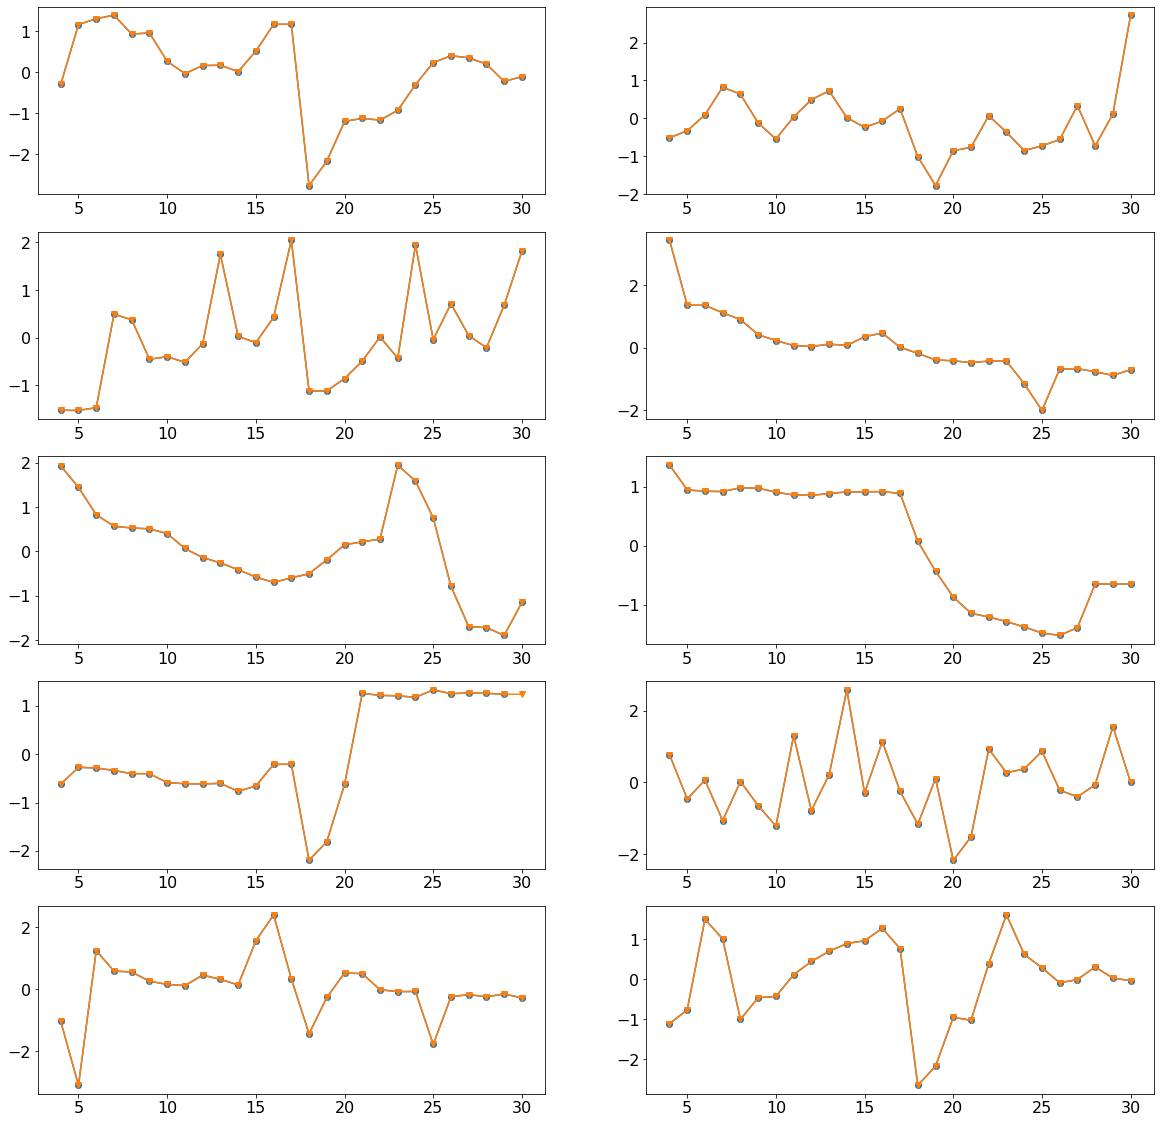

In [15]:
# fill in NaNs
plt.figure(1,figsize=(20,20))
for m in range(10):
    plt.subplot(5,2,m+1)
    plt.plot(of_reg[:,m],marker='o')
    of_nan = np.where(np.isnan(of_reg[:,m]))[0]
    #print('Movie ',m, ',before:',of_reg[:,m], '\n, nan:',of_nan)

    for nan in of_nan:
        if (nan > tr0_ind) and (nan < (of_reg.shape[0]-1)):
            of_reg[nan,m] = np.nanmean([of_reg[nan-1,m],of_reg[nan+1,m]])
        elif nan == (of_reg.shape[0]-1):
            of_reg[nan,m] = of_reg[nan-1,m]
    plt.plot(of_reg[:,m],marker = 'v')
    #print('After:',of_reg[:,m])

plt.figure(2,figsize=(20,20))
for m in range(10):
    plt.subplot(5,2,m+1)
    plt.plot(brightness_reg[:,m],marker='o')
    of_nan = np.where(np.isnan(brightness_reg[:,m]))[0]
    #print('Movie ',m, ',before:',brightness_reg[:,m], '\n, nan:',of_nan)

    for nan in of_nan:
        if (nan > tr0_ind) and (nan < (of_reg.shape[0]-1)):
            brightness_reg[nan,m] = np.nanmean([brightness_reg[nan-1,m],brightness_reg[nan+1,m]])
        elif nan == (of_reg.shape[0]-1):
            brightness_reg[nan,m] = brightness_reg[nan-1,m]
    plt.plot(brightness_reg[:,m],marker = 'v')
    #print('After:',of_reg[:,m])

(0.0, 20.0)

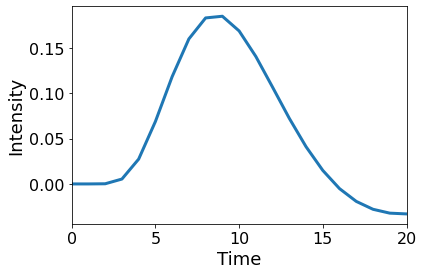

In [244]:
#defining the hrf
from nltools.external import glover_hrf

tr = .72
#hrf function
hrf = glover_hrf(tr, oversampling=1)
plt.plot(hrf, linewidth=3)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.xlim(0,20)

-0.6312805884898275

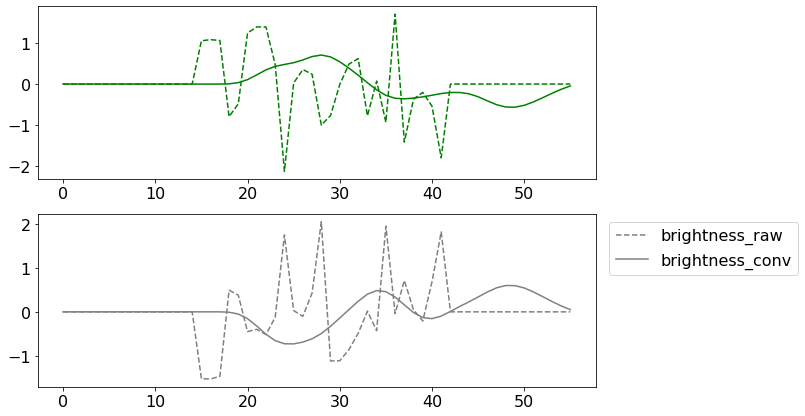

In [23]:
def return_reg_coef(df, plotfig =0):
    
    rows = ~(np.isnan(df[:,0])) & ~(np.isnan(df[:,1])) & ~(np.isnan(df[:,2])) 
    total_len = df.shape[0]
    
    if len(np.where(rows)[0]) != total_len: # if NaN is present
        df_nonan = df[rows,:]
        of_reg = df_nonan[:,1]
        of_reg = of_reg.reshape(-1,1)
        model = LinearRegression().fit(of_reg, df_nonan[:,0])
    else:
        of_reg = df[:,1]
        of_reg = of_reg.reshape(-1,1)
        model = LinearRegression().fit(df[:,1:], df[:,0])
        
    if plotfig:
        #plt.plot(df[:,0],label='raw TC')
        plt.subplot(211)
        plt.plot(df[:,1],label='optflow_conv',color='g')
        plt.subplot(212)
        plt.plot(df[:,2],label='brightness_conv',color='grey')
        plt.legend(bbox_to_anchor=[1.01,1])
    #print(resid1-resid)
    #print(model.coef_)
    return model.coef_[0]

plt.figure(1,figsize=(10,7))
s,n,m = 0,0,2
inds = np.arange(vid_start_rel_tr[m]+1,vid_start_rel_tr[m]+l_task)

plt.subplot(211)
reg1 = np.zeros((len(timepts_indiv_movie[m]),))
reg1[inds] = of_reg[tr0_ind+1:,m] #np.linspace(.01,1,len(inds))
plt.plot(reg1,label='optflow_raw',color='g',ls='--')
reg1 = np.convolve(reg1, hrf)[:len(reg1)]

plt.subplot(212)
reg2 = np.zeros((len(timepts_indiv_movie[m]),))
reg2[inds] = brightness_reg[tr0_ind+1:,m] #np.linspace(.01,1,len(inds))
plt.plot(reg2,label='brightness_raw',color='grey',ls='--')
reg2 = np.convolve(reg2, hrf)[:len(reg2)]

return_reg_coef(np.array([tcs_run_z[s,n,:,m],reg1,reg2]).T,1) # np.array([tcs_run_z[s,n,tr0_ind:,m],of_reg[tr0_ind:,m]]).T 

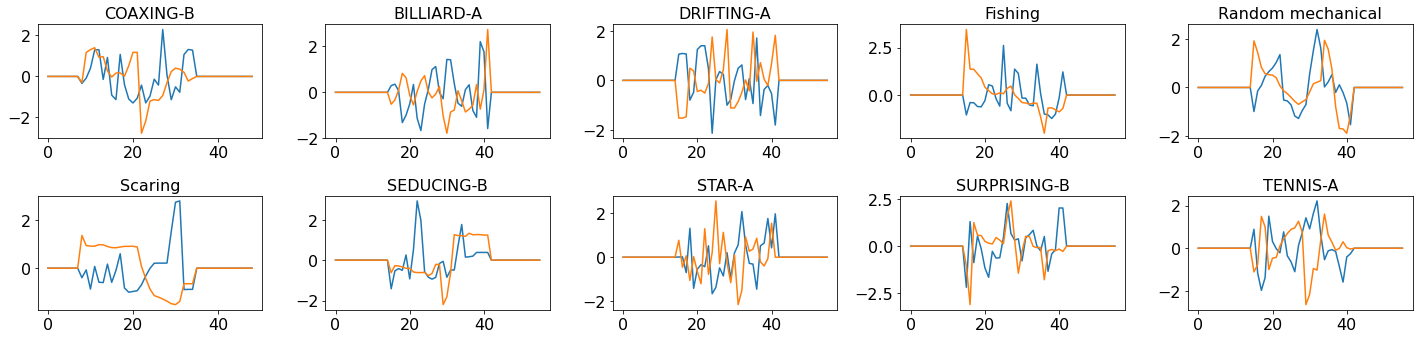

In [18]:
plt.figure(1,figsize=(20,5))
for m in range(10):
    reg = np.zeros((len(timepts_indiv_movie[m]),2))
    inds = np.arange(vid_start_rel_tr[m]+1,vid_start_rel_tr[m]+l_task)
    for ireg in range(2): 
        if ireg==0:
            reg[inds,0] = of_reg[tr0_ind+1:,m] #np.linspace(.01,1,len(inds))
        else:
            reg[inds,1] = brightness_reg[tr0_ind+1:,m] #np.linspace(.01,1,len(inds))
    plt.subplot(2,5,m+1)
    plt.plot(reg[:,0])
    plt.plot(reg[:,1])
    #plt.plot(reg_all[m][:,0])
    plt.title(vidnames[m])
plt.tight_layout()

In [19]:
of_reg_conv = []
brig_reg_conv = []
for m in range(10):
    
    inds = np.arange(vid_start_rel_tr[m]+1,vid_start_rel_tr[m]+l_task)      
    reg1 = np.zeros((len(timepts_indiv_movie[m]),))
    reg1[inds] = of_reg[tr0_ind+1:,m] #np.linspace(.01,1,len(inds))
    reg1 = np.convolve(reg1, hrf)[:len(reg1)]
    of_reg_conv.append(reg1)

    reg2 = np.zeros((len(timepts_indiv_movie[m]),))
    reg2[inds] = brightness_reg[tr0_ind+1:,m] #np.linspace(.01,1,len(inds))
    reg2 = np.convolve(reg2, hrf)[:len(reg2)]
    brig_reg_conv.append(reg2)


In [21]:
parallelise=0

In [274]:
remove_fixation = 0

In [275]:
parallelise

0

In [276]:
load_coef = 0 # 1: load residuals, 0: compute residuals for all subs because this can be useful for plotting random mech timecourses too
start_time = time.time()
if load_coef == 0:
    of_coef_run = np.empty((tcs_run_z.shape[0],268,10)) #subs, nodes, timepts, movies
    of_coef_run[:] = np.nan
    #parallelise = 1
    for s in np.arange(tcs_run_z.shape[0]):
        if (s%10 == 0) and (s!=0):
            print(s, f'time elapsed: {(time.time()-start_time)/60:.2f}')
        for m in np.arange(0,10):
            
            reg1 = of_reg_conv[m]
            reg2 = brig_reg_conv[m]
            if  m%5 == 0:
                df = [np.array([tcs_run_z[s,n,:49,m],reg1,reg2]).T for n in range(268)]
            else:
                df = [np.array([tcs_run_z[s,n,:,m],reg1,reg2]).T for n in range(268)]

            if remove_fixation == 1:
                df = [i[vid_start_rel_tr[m]:vid_start_rel_tr[m]+28,:] for i in df]
            if parallelise:
                of_coef = Parallel(n_jobs=10)(delayed(return_reg_coef)(y) for y in df)  # pool.map(return_residuals,df_coax) 
                #resid_tc[i,:,tr0_ind:,0],resid_tc[i,:,tr0_ind:,1] = np.array(residuals_coax), np.array(residuals_bill)
                of_coef_run[s,:,m] = np.array(of_coef)
            else:
                for n in range(268):
                    #print(n)
                    of_coef_run[s,n,m] =   return_reg_coef(df[n])                    
                    #resid_tc[i,n,tr0_ind:,0],resid_tc[i,n,tr0_ind:,1] =   return_residuals(np.array([tcs_trial_z[s,n,tr0_ind:,0],of_reg[tr0_ind:,0],brightness_reg[tr0_ind:,0]]).T),\
                    #                                                  return_residuals(np.array([tcs_trial_z[s,n,tr0_ind:,1],of_reg[tr0_ind:,1],brightness_reg[tr0_ind:,1]]).T)                    
    if remove_fixation == 1:
        suff = '_nofixation'
    else:
        suff = ''
    np.save(os.path.join(data_file_loc,f'of_reg_z_runwise_earlyTR_{suff}.npy'),of_coef_run)
else:
    if remove_fixation == 1:
        suff = '_nofixation'
    else:
        suff = ''
    of_coef_run = np.load(os.path.join(data_file_loc,f'of_reg_z_runwise_earlyTR_{suff}.npy'))
    
print('Done. Time taken:',time.time()-start_time)

10 time elapsed: 0.11
20 time elapsed: 0.22
30 time elapsed: 0.33
40 time elapsed: 0.45
50 time elapsed: 0.57
60 time elapsed: 0.69
70 time elapsed: 0.81
80 time elapsed: 0.92
90 time elapsed: 1.03
100 time elapsed: 1.15
110 time elapsed: 1.27
120 time elapsed: 1.38
130 time elapsed: 1.50
140 time elapsed: 1.62
150 time elapsed: 1.74
160 time elapsed: 1.87
170 time elapsed: 1.99
180 time elapsed: 2.12
190 time elapsed: 2.24
200 time elapsed: 2.34
210 time elapsed: 2.45
220 time elapsed: 2.57
230 time elapsed: 2.67
240 time elapsed: 2.77
250 time elapsed: 2.88
260 time elapsed: 2.99
270 time elapsed: 3.11
280 time elapsed: 3.22
290 time elapsed: 3.33
300 time elapsed: 3.45
310 time elapsed: 3.56
320 time elapsed: 3.67
330 time elapsed: 3.79
340 time elapsed: 3.90
350 time elapsed: 4.01
360 time elapsed: 4.12
370 time elapsed: 4.23
380 time elapsed: 4.34
390 time elapsed: 4.45
400 time elapsed: 4.56
410 time elapsed: 4.67
420 time elapsed: 4.78
430 time elapsed: 4.89
440 time elapsed: 5.

In [277]:
from pymer4.models import Lmer,Lm
from mne.stats import fdr_correction
from multipy.fdr import lsu

# ALL MOVIES

In [278]:
# first of all, best to remove subjects with < 10 responses for power in general (and to keep consistent with beh results on all movies)
count_resp = np.zeros((responses.shape[0],))
for i in range(responses.shape[0]):
    count_resp[i] = len(np.where(~np.isnan(responses[i,:]))[0]) # nr. of responses per sub
#subs_10resp = np.where(count_resp == 10)[0]
subs_10resp = count_resp == 10
nsubs = len(np.where(subs_10resp)[0])
len(np.where(subs_10resp)[0])

subs_10resp_subs = np.where(subs_10resp)[0]
subs_10resp_subs.shape,subs_10resp.shape
nsubs = np.where(subs_10resp_subs)[0].shape[0]
nsubs

814

In [279]:
of_coef_run_allresp = of_coef_run[subs_10resp,:,:]
of_coef_run_allresp.shape

(814, 268, 10)

In [280]:
moviewise_mean, moviewise_pval,moviewise_pval_fdr = [np.empty((268,10)) for _ in range(3)]
moviewise_mean[:], moviewise_pval[:], moviewise_pval_fdr[:] = [np.nan]*3
moviewise_pval_fdr_list = []
for m in range(10):
    for n in range(268):
        vec = of_coef_run_allresp[:,n,m]
        _,moviewise_pval[n,m] = stats.ttest_1samp(vec,0)
        moviewise_mean[n,m] = np.nanmean(vec)
    moviewise_pval_fdr[:,m] = lsu(moviewise_pval[:,m],q=.05)
    moviewise_pval_fdr_list.append(lsu(moviewise_pval[:,m],q=.05))

In [281]:
for m in range(10):
    print('movie',m,', nsig nodes:',len(np.where(moviewise_pval_fdr_list[m])[0]))

movie 0 , nsig nodes: 222
movie 1 , nsig nodes: 233
movie 2 , nsig nodes: 247
movie 3 , nsig nodes: 224
movie 4 , nsig nodes: 245
movie 5 , nsig nodes: 234
movie 6 , nsig nodes: 235
movie 7 , nsig nodes: 213
movie 8 , nsig nodes: 268
movie 9 , nsig nodes: 182


In [282]:
sub_all = np.tile(np.arange(nsubs),10)
movie_all = np.repeat(np.arange(10),nsubs) # 0,0,...814 times, 1,1...814 times,......9,9,9....814 times..9
df = pd.DataFrame({'beta':np.empty((nsubs*of_coef_run.shape[2],)),'subID':sub_all,'movie':movie_all})
df.shape

(8140, 3)

In [283]:
coef_of,pval_of,coef_of_movie,pval_of_movie,mean_of_1samp_ttest,pval_of_1samp_ttest = [np.empty((268,)) for  _ in range(6)]
coef_of[:],pval_of[:],coef_of_movie[:], pval_of_movie[:], mean_of_1samp_ttest[:],pval_of_1samp_ttest[:] = [np.nan]*6
coef_of_coaxbill,pval_of_coaxbill = [np.empty((268,)) for  _ in range(2)]
coef_of_coaxbill[:],pval_of_coaxbill[:] = [np.nan]*2
warning_of = []
warning_of_movie = []
start_time = time.time()
for n in range(268):
    if n%10 == 0:
        print(f'Node {n}, time taken: {(time.time()-start_time)/60}')
    of_node = []
    for m in range(10):
        of_node.extend(of_coef_run_allresp[:,n,m])
    df['beta'] = of_node
    
    rows = ~np.isnan(df['beta']) & ~np.isnan(df['subID'])
    df1 = df.loc[rows,:]
    df1['garbage'] = np.random.uniform(0, 1, df1.shape[0])

    model = Lmer('beta ~  1 + garbage + (1|subID)', data=df1) # ff: mean response, rf:subjID
    model.fit(summary = False, verbose = False, no_warnings=True)
    #if len(model.warnings) == 0: # model did converge or had a boundary fit (only warnings i've seen in this case) -> save coefs
    coef_of[n],pval_of[n] = model.coefs['Estimate'][0],model.coefs['P-val'][0]
    #else: # don't save coefs if there were warnings, but print the warning
    #if len(model.warnings) != 0: # model did converge or had a boundary fit (only warnings i've seen in this case) -> save coefs
    warning_of.append(model.warnings)
    #print(model.warnings,'sub only model, node:', n)
    
    model = Lmer('beta ~  1 + garbage + (1|subID) + (1|movie)', data=df1) # ff: mean response, rf:subjID
    model.fit(summary = False, verbose = False, no_warnings=True)
    #if len(model.warnings) == 0: # model did converge or had a boundary fit (only warnings i've seen in this case) -> save coefs
    coef_of_movie[n],pval_of_movie[n] = model.coefs['Estimate'][0],model.coefs['P-val'][0]
    #else: # don't save coefs if there were warnings, but print the warning
    #if len(model.warnings) != 0: # model did converge or had a boundary fit (only warnings i've seen in this case) -> save coefs
    warning_of_movie.append(model.warnings)
    #print(model.warnings,'movie model, node:', n)
   
    #sanity check if the intercept above is a fine thing to interpret (but without accounting for subjects and movie)
    _,pval_of_1samp_ttest[n] = stats.ttest_1samp(of_node,0) # mean optic flow per node different from 0?
    mean_of_1samp_ttest[n] = np.nanmean(of_node)

# multiple comparisons correction
pval_of_1samp_ttest_fdr = lsu(pval_of_1samp_ttest,q=.05)
pval_of_fdr = lsu(pval_of,q=.05)
pval_of_movie_fdr = lsu(pval_of_movie,q=.05)
(time.time()- start_time)/60

Node 0, time taken: 3.532568613688151e-06
Node 10, time taken: 0.16108444929122925
Node 20, time taken: 0.3195534149805705
Node 30, time taken: 0.4757216135660807
Node 40, time taken: 0.6344760656356812
Node 50, time taken: 0.7924362023671468
Node 60, time taken: 0.9466260313987732
Node 70, time taken: 1.1051582495371501
Node 80, time taken: 1.2633538166681926
Node 90, time taken: 1.4306880672772726
Node 100, time taken: 1.5951197504997254
Node 110, time taken: 1.7584483663241068
Node 120, time taken: 1.9171181519826253
Node 130, time taken: 2.073830298582713
Node 140, time taken: 2.232843267917633
Node 150, time taken: 2.3916257500648497
Node 160, time taken: 2.5448689659436545
Node 170, time taken: 2.6944841504096986
Node 180, time taken: 2.8490304986635846
Node 190, time taken: 3.0027546803156535
Node 200, time taken: 3.1571187655131023
Node 210, time taken: 3.3178110321362815
Node 220, time taken: 3.475969048341115
Node 230, time taken: 3.627185281117757
Node 240, time taken: 3.779

4.208007097244263

In [284]:
np.where(pval_of_movie_fdr),len(np.where(pval_of_fdr)[0]),len(np.where(pval_of_1samp_ttest_fdr)[0])

((array([], dtype=int64),), 238, 258)

# Plot brainmaps

In [285]:
#import plotting functions
from nltools.data import Brain_Data
from nltools.mask import expand_mask, roi_to_brain
#from nilearn.plotting import plot_glass_brain,plot_stat_map,plot_surf,view_img_on_surf,plot_img
from nilearn.plotting import plot_surf_roi, plot_img, plot_surf_contours
from nilearn import datasets,surface
import nibabel as nib

#import nilearn
#nilearn.__version__ # .7.0 in py37 env

mask = Brain_Data('https://neurovault.org/media/images/8423/shen_2mm_268_parcellation.nii.gz')
mask_x = expand_mask(mask)

fsaverage = datasets.fetch_surf_fsaverage()

shen268_lbl = pd.read_csv(os.path.join(data_file_loc,"shen_dictionary.csv"))
#shen268_lbl

bg_img = datasets.load_mni152_template()

lbl = [str.upper(x[0:4]) for x in vidnames]
lbl

['COAX',
 'BILL',
 'DRIF',
 'FISH',
 'RAND',
 'SCAR',
 'SEDU',
 'STAR',
 'SURP',
 'TENN']

In [286]:
from nilearn.surface import vol_to_surf
from nilearn.plotting import plot_glass_brain, plot_surf_roi,plot_stat_map,plot_img,plot_surf_contours
from nilearn import datasets
bg_img = datasets.load_mni152_template()
from nilearn.datasets import fetch_surf_fsaverage
fsaverage = fetch_surf_fsaverage()
#coords = [10*int(i) for i in np.linspace(-4,

In [287]:
# for comparison with the other main figure if needed
nodes_coaxbill_rand_all = np.load(os.path.join(data_file_loc,'nodes_coaxbill_rand_all.npy')) # sig nodes hihglighted in the first S>NS GLM
len(np.where(nodes_coaxbill_rand_all)[0])

81

In [288]:
fig_save_loc = os.path.join(f'/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/paper_prep/figures/fig5_timecourse/ALL_MOVIES_OF/{suff}')

In [289]:
def color_rois(values):
    """
    This function assumes you are passing a vector "values" with the same length as the number of nodes in the atlas.
    """
    shen268 = nib.load(os.path.join(data_file_loc,"shen_2mm_268_parcellation.nii.gz"))
    shen268_data = shen268.get_fdata()
    img = np.zeros(shen268_data.shape)
    #print(shen268_data.shape)
    for roi in range(len(values)):
        itemindex = np.where(shen268_data==roi+1) # find voxels in this node (add 1 to account for zero-indexing)
        #print(len(itemindex[0]))
        img[itemindex] = values[roi] # color them by the desired value 

    affine = shen268.affine
    img_nii = nib.Nifti1Image(img, affine)
    
    return img_nii


In [290]:
fig_save_loc

'/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/paper_prep/figures/fig5_timecourse/ALL_MOVIES_OF/'

In [291]:
def surfplot_coeffts(nodes, params,fig,ax):
    vmin = params['vmin']
    vmax = params['vmax']
    cmap = params['cmap']
    title_txt = params['title_txt']
    txt = params['txt']

    #LH
    texture = vol_to_surf(color_rois(nodes), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
    surf_plot1=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, symmetric_cmap=True, vmin = vmin, vmax = vmax,
                                bg_map=fsaverage.sulc_left,axes=ax[0])#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
    surf_plot1.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
    texture_contour = vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
    plot_surf_contours(fsaverage.infl_left, texture_contour, axes=ax[0],figure=surf_plot1, legend=True,levels = [1], colors=['k'])
    
    surf_plot2=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, symmetric_cmap=True, vmin = vmin, vmax = vmax,
                                bg_map=fsaverage.sulc_left, view = 'medial',axes=ax[1])#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
    plot_surf_contours(fsaverage.infl_left, texture_contour, axes=ax[1],figure=surf_plot2, legend=True,levels = [1], colors=['k'])
    
    v5_texture = surface.vol_to_surf(v5_roi_nii,fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
    thr99 = np.quantile(v5_texture,.99)
    v5_texture[v5_texture<thr99] = 0
    v5_texture[v5_texture!=0] = 1
    plot_surf_contours(fsaverage.infl_left, v5_texture, figure=surf_plot1, legend=False, axes=ax[0],levels=[1],colors=['r'])#,levels = [texture],  labels=['Fig 3 nodes'])
    plot_surf_contours(fsaverage.infl_left, v5_texture, figure=surf_plot2, legend=False, axes=ax[1],levels=[1],colors=['r'])#,levels = [texture],  labels=['Fig 3 nodes'])
    

    #RH
    texture = vol_to_surf(color_rois(nodes), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
    surf_plot3=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=True,symmetric_cmap=True, vmin = vmin, vmax = vmax,
                                bg_map=fsaverage.sulc_right,axes=ax[3])
    texture_contour = vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
    plot_surf_contours(fsaverage.infl_right, texture_contour, axes=ax[3],figure=surf_plot3, legend=True,levels = [1], colors=['k'])
    surf_plot3.axes[4].text(10,.5*vmax,s=txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
    
    surf_plot4=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=False,symmetric_cmap=True, vmin = vmin, vmax = vmax,
                                bg_map=fsaverage.sulc_right, view ='medial',axes=ax[2])
    plot_surf_contours(fsaverage.infl_right, texture_contour, axes=ax[2],figure=surf_plot4, legend=True, levels = [1], colors=['k'])
    
    v5_texture = surface.vol_to_surf(v5_roi_nii, fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
    thr99 = np.quantile(v5_texture,.99)
    v5_texture[v5_texture<thr99] = 0
    v5_texture[v5_texture!=0] = 1
    plot_surf_contours(fsaverage.infl_right, v5_texture, figure=surf_plot3, legend=False, axes=ax[3],levels=[1],colors=['r'])#,levels = [texture],  labels=['Fig 3 nodes'])
    plot_surf_contours(fsaverage.infl_right, v5_texture, figure=surf_plot4, legend=False, axes=ax[2],levels=[1],colors=['r'])#,levels = [texture],  labels=['Fig 3 nodes'])
    

In [292]:
min(mean_of_1samp_ttest),max(mean_of_1samp_ttest),min(coef_of),max(coef_of)

(-0.07792334152535146,
 0.269714710363707,
 -0.06270227824140254,
 0.261039848911377)

In [293]:
v5_roi = 'v5_association-test_z_FDR_0.01.nii'
v5_roi_loc = f'/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/data/ROIs/{v5_roi}'
v5_roi_nii = nib.load(v5_roi_loc)

In [294]:
coef_of[pval_of_fdr<.05]

array([ 0.02775506,  0.03134694,  0.03079546, -0.00455727, -0.02381674,
        0.01480014, -0.00034929,  0.03691517,  0.02132157, -0.01799797,
        0.00126927, -0.01118584,  0.02450113,  0.00744674, -0.02493263,
       -0.00272606,  0.02485644, -0.0098001 ,  0.00254615,  0.03874575,
        0.01295566, -0.02088676, -0.01840815,  0.02193652,  0.01959791,
        0.02760554,  0.02240419,  0.00191843,  0.02244891,  0.02130618])

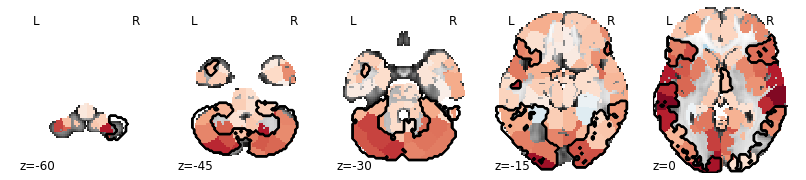

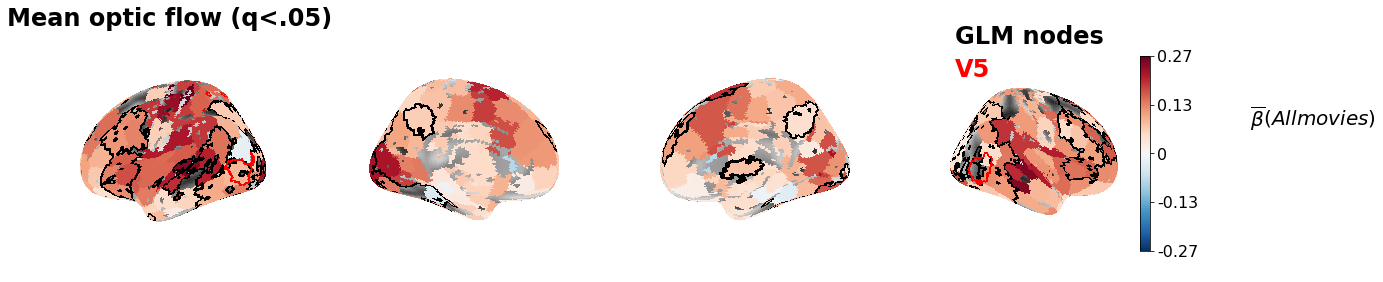

In [ ]:
absmax= max(np.abs(mean_of_1samp_ttest[pval_of_1samp_ttest_fdr]))
vmin,vmax = -absmax,absmax
cmap = 'RdBu_r'
title_txt = 'Mean optic flow (q<.05)'
#txt = '  'r"$\overline{\beta}{(''Social'')}-$" + '\n  ' + r"$\overline{\beta}{(''Non-social'')}$"
txt = '  'r"$\overline{\beta}{(All movies)}$"

nodes = np.zeros((268,))
nodes[pval_of_1samp_ttest_fdr] = mean_of_1samp_ttest[pval_of_1samp_ttest_fdr]

img = roi_to_brain(pd.Series(nodes), mask_x)
coords = [-60,-45,-30,-15,0] 
ax_plot = plot_img(img.to_nifti(), display_mode = 'z',vmin = vmin, vmax = vmax, cut_coords =coords,cmap = cmap, bg_img = bg_img,colorbar= False,threshold = .0001)
ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles ='-',filled=False)
plt.savefig(os.path.join(fig_save_loc,f'axial_1samp_optflow.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

params = {'vmin':vmin,'vmax':vmax, 'cmap': cmap, 'title_txt': title_txt, 'txt' :'  'r"$\overline{\beta}{(All movies)}$"}
fig,ax = plt.subplots(nrows=1, ncols= 4,figsize=(20,6),subplot_kw={'projection': '3d'})
surfplot_coeffts(nodes, params,fig,ax)
ax[3].annotate('GLM nodes', xy=(.15,1), xycoords='axes fraction',fontsize = 24,fontweight='bold')
ax[3].annotate('V5', xy=(.15,.85), xycoords='axes fraction', color='r',fontsize = 24,fontweight='bold')
plt.savefig(os.path.join(fig_save_loc,f'surf_1samp_optflow.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


-0.3788159583640923

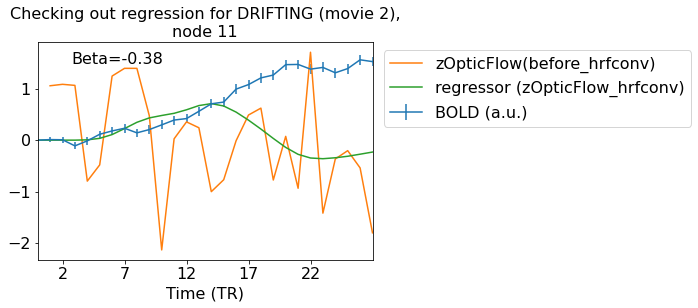

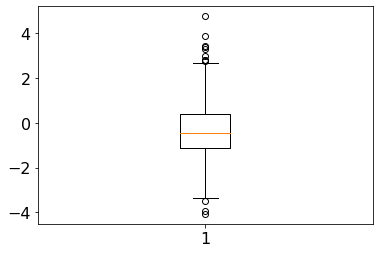

In [296]:
n=10
m=2
tc = tcs_run_z[subs_10resp,n,vid_start_rel_tr[m]-3:vid_start_rel_tr[m]+28,m]*2
plt.title(f'Checking out regression for DRIFTING (movie 2),\nnode {n+1}')
plt.errorbar(range(31),np.nanmedian(tc,axis=0),stats.sem(tc,axis=0), label = 'BOLD (a.u.)')
plt.plot(of_reg[:,m],label = 'zOpticFlow(before_hrfconv)')
plt.plot(of_reg_conv[m][vid_start_rel_tr[m]-3:vid_start_rel_tr[m]+28], label = 'regressor (zOpticFlow_hrfconv)')
plt.annotate(f'Beta={np.nanmean(of_coef_run_allresp[:,n,m]):.2f}', xy=(.1,.9), xycoords='axes fraction')
plt.xticks(np.arange(0,30,5),[i-3 for i in np.arange(0,30,5)])

plt.legend(bbox_to_anchor=[1.01,1])
plt.xlabel('Time (TR)')
plt.xlim(3,30)

plt.figure(2)
plt.boxplot(of_coef_run_allresp[:,n,m])
np.nanmean(of_coef_run_allresp[:,n,m])

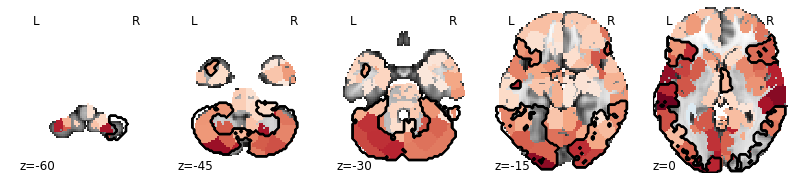

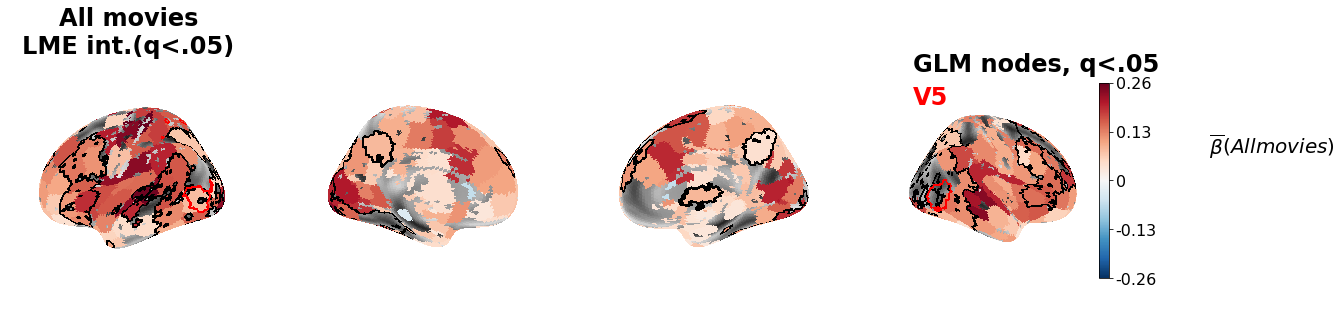

In [306]:
absmax= max(np.abs(coef_of[pval_of_fdr]))
vmin,vmax = -absmax,absmax
cmap = 'RdBu_r'
title_txt = 'All movies\nLME int.(q<.05)'
#txt = '  'r"$\overline{\beta}{(''Social'')}-$" + '\n  ' + r"$\overline{\beta}{(''Non-social'')}$"
txt = '  'r"$\overline{\beta}{(All movies)}$"

nodes = np.zeros((268,))
nodes[pval_of_fdr] = coef_of[pval_of_fdr]

img = roi_to_brain(pd.Series(nodes), mask_x)
coords = [-60,-45,-30,-15,0] 
ax_plot = plot_img(img.to_nifti(), display_mode = 'z',vmin = vmin, vmax = vmax, cut_coords =coords,cmap = cmap, bg_img = bg_img,colorbar= False,threshold = .0001)
ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles ='-',filled=False)
plt.savefig(os.path.join(fig_save_loc,f'axial_lme_subj_optflow.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


params = {'vmin':vmin,'vmax':vmax, 'cmap': cmap, 'title_txt': title_txt, 'txt' :'  'r"$\overline{\beta}{(All movies)}$"}
fig,ax = plt.subplots(nrows=1, ncols= 4,figsize=(20,6),subplot_kw={'projection': '3d'})
surfplot_coeffts(nodes, params,fig,ax)
ax[3].annotate('GLM nodes, q<.05', xy=(.15,1), xycoords='axes fraction',fontsize = 24,fontweight='bold')
ax[3].annotate('V5', xy=(.15,.85), xycoords='axes fraction', color='r',fontsize = 24,fontweight='bold')
plt.savefig(os.path.join(fig_save_loc,f'surf_lme_subj_optflow.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

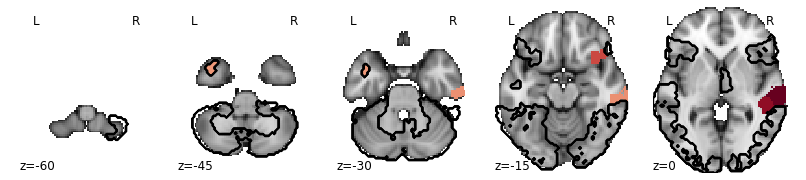

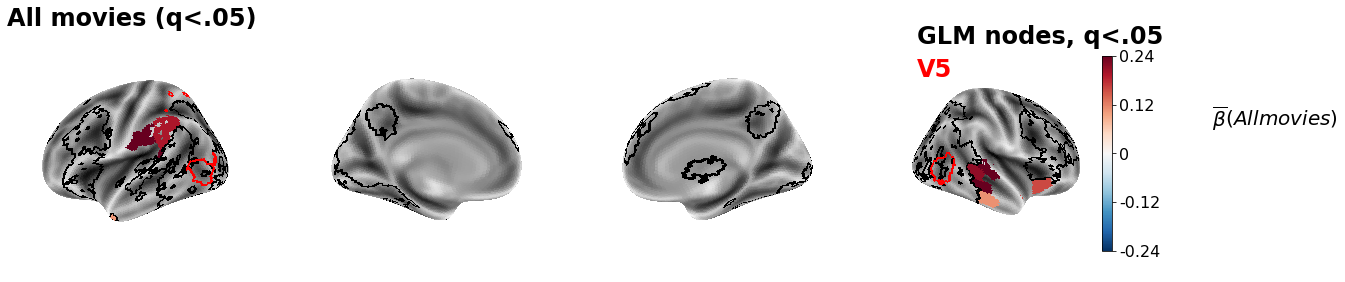

In [307]:
absmax= max(np.abs(coef_of_movie[pval_of_movie<.05]))
vmin,vmax = -absmax,absmax
cmap = 'RdBu_r'
title_txt = 'All movies (q<.05)'
#txt = '  'r"$\overline{\beta}{(''Social'')}-$" + '\n  ' + r"$\overline{\beta}{(''Non-social'')}$"
txt = '  'r"$\overline{\beta}{(All movies)}$"

nodes = np.zeros((268,))
nodes[pval_of_movie<.05] = coef_of_movie[pval_of_movie<.05]

img = roi_to_brain(pd.Series(nodes), mask_x)
coords = [-60,-45,-30,-15,0] 
ax_plot = plot_img(img.to_nifti(), display_mode = 'z',vmin = vmin, vmax = vmax, cut_coords =coords,cmap = cmap, bg_img = bg_img,colorbar= False,threshold = .0001)
ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles ='-',filled=False)
plt.savefig(os.path.join(fig_save_loc,f'axial_lme_subj_movie_optflow.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

params = {'vmin':vmin,'vmax':vmax, 'cmap': cmap, 'title_txt': title_txt, 'txt' :'  'r"$\overline{\beta}{(All movies)}$"}
fig,ax = plt.subplots(nrows=1, ncols= 4,figsize=(20,6),subplot_kw={'projection': '3d'})
surfplot_coeffts(nodes, params,fig,ax)
ax[3].annotate('GLM nodes, q<.05', xy=(.15,1), xycoords='axes fraction',fontsize = 24,fontweight='bold')
ax[3].annotate('V5', xy=(.15,.85), xycoords='axes fraction', color='r',fontsize = 24,fontweight='bold')
plt.savefig(os.path.join(fig_save_loc,f'surf_lme_subj_movie_optflow.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')



# COAX-BILL

In [302]:
subs = np.where((responses[:,0] == 1)&(responses[:,1] == 0))[0] 

mean_of_coaxbill,pval_of_coaxbill_ttest = [np.empty((268,)) for  _ in range(2)]
mean_of_coaxbill[:],pval_of_coaxbill_ttest[:] = [np.nan]*2
for n in range(268):
    _,pval_of_coaxbill_ttest[n] = stats.ttest_rel(of_coef_run[subs,n,0], of_coef_run[subs,n,1])
    mean_of_coaxbill[n] = np.nanmean(of_coef_run[subs,n,0] - of_coef_run[subs,n,1])
pval_of_coaxbill_ttest_fdr = lsu(pval_of_coaxbill_ttest,q=.05)

#coef_of_coaxbill,pval_of_coaxbill # from the LME

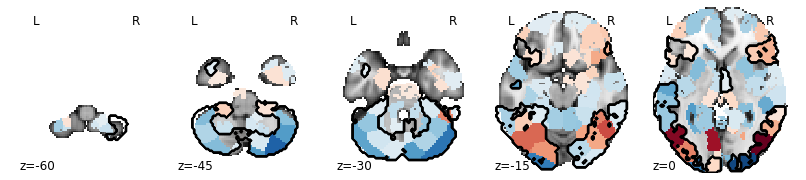

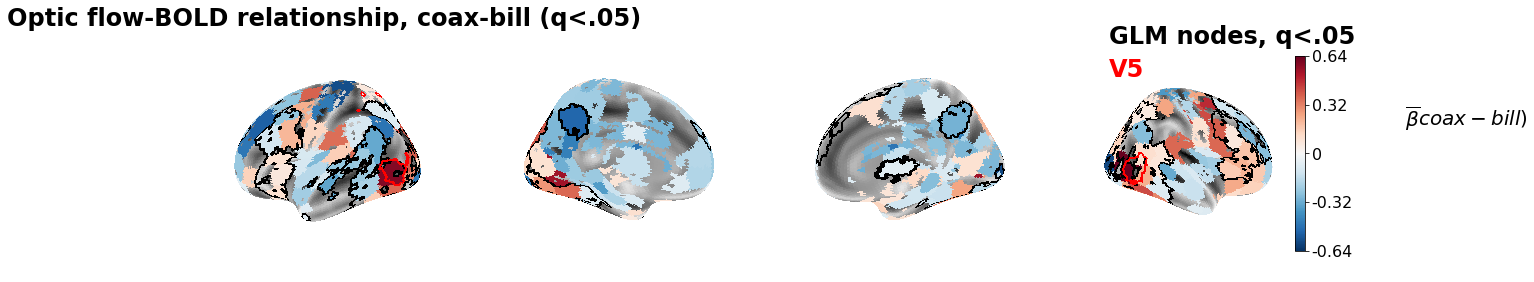

In [312]:
absmax= max(np.abs(mean_of_coaxbill[pval_of_coaxbill_ttest_fdr]))
vmin,vmax = -absmax,absmax
cmap = 'RdBu_r'
#txt = r' $\overline{\beta}(\""")-$' + '\n' + r'$\overline{\beta}_{Non-social}$'+ '\n'
title_txt = 'Optic flow-BOLD relationship, coax-bill (q<.05)'
#txt = '  'r"$\overline{\beta}{(''Social'')}-$" + '\n  ' + r"$\overline{\beta}{(''Non-social'')}$"
txt = '  'r"$\overline{\beta}{coax-bill)}$"

nodes = np.zeros((268,))
nodes[pval_of_coaxbill_ttest_fdr] = mean_of_coaxbill[pval_of_coaxbill_ttest_fdr]

img = roi_to_brain(pd.Series(nodes), mask_x)
coords = [-60,-45,-30,-15,0] 
ax_plot = plot_img(img.to_nifti(), display_mode = 'z',vmin = vmin, vmax = vmax, cut_coords =coords,cmap = cmap, bg_img = bg_img,colorbar= False,threshold = .0001)
ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles ='-',filled=False)
plt.savefig(os.path.join(fig_save_loc,f'axial_lme_coaxbill_optflow.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

params = {'vmin':vmin,'vmax':vmax, 'cmap': cmap, 'title_txt': title_txt, 'txt' :txt}
fig,ax = plt.subplots(nrows=1, ncols= 4,figsize=(20,6),subplot_kw={'projection': '3d'})
surfplot_coeffts(nodes, params,fig,ax)
ax[3].annotate('GLM nodes, q<.05', xy=(.15,1), xycoords='axes fraction',fontsize = 24,fontweight='bold')
ax[3].annotate('V5', xy=(.15,.85), xycoords='axes fraction', color='r',fontsize = 24,fontweight='bold')
plt.savefig(os.path.join(fig_save_loc,f'surf_lme_coaxbill_optflow.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

In [315]:
subs.shape


(870,)

# All except COAX-BILL

In [ ]:

# preparing for an LME for "all others"
sub_all = np.tile(np.arange(of_coef_run.shape[0]),8)
movie_all = np.repeat(np.arange(8),1048)
df_allexcept = pd.DataFrame({'beta':np.empty((of_coef_run.shape[0]*(of_coef_run.shape[2]-2),)),'subID':sub_all,'movie':movie_all})

# preparing for the lme by defining the long 1Darray

mmin,mmax = 2,10

responses_txt_minus_coaxbill_col=[] # store responses as a long 1D array (list)
subID_minus_coaxbill = []
movie_minus_coaxbill = []
for m in np.arange(mmin,mmax):
    responses_txt_minus_coaxbill_col.extend(list(np.array(responses_txt[m])[subs_10resp]))
    subID_minus_coaxbill.extend(np.where(subs_10resp)[0])
    movie_minus_coaxbill.extend(np.repeat(m,nsubs))
len(responses_txt_minus_coaxbill_col),len(subID_minus_coaxbill),len(movie_minus_coaxbill)

# for use in function below!

# lme rows
nsubs = len(np.where(subs_10resp)[0])
rows = []
for m in np.arange(mmin,mmax):
    rows.append(np.arange((m-mmin)*nsubs,((m-mmin)+1)*nsubs))
rows[0][:10],rows[1][:10]

df_allexcept = pd.DataFrame({'BOLD':np.empty((6512,)),'response':responses_txt_minus_coaxbill_col,'subID':subID_minus_coaxbill})#,'movie':movie_minus_coaxbill})   
print(df.shape)
sel_rows = (df_allexcept['response']== 'Nonsocial') | (df_allexcept['response']== 'Social')# (df['response']!= 'Neither') & (df['response']!= 'Unsure')
print(len(np.where(sel_rows)[0]))
df_allexcept = df_allexcept.loc[sel_rows,:] # yes v no, all movies, remove all other responses
bold = np.empty((6512,))#nsubs*(mmax-mmin),))# 814*8 rows


coef_of_allexcept,   pval_of_allexcept,   coef_of_movie_allexcept,    pval_of_movie_allexcept,    mean_of_1samp_ttest_allexcept,   pval_of_1samp_ttest_allexcept = [np.empty((268,)) for  _ in range(6)]
coef_of_allexcept[:],pval_of_allexcept[:],coef_of_movie_allexcept[:], pval_of_movie_allexcept[:], mean_of_1samp_ttest_allexcept[:],pval_of_1samp_ttest_allexcept[:] = [np.nan]*6

start_time = time.time()
for n in range(268):
    of_node = []
    for m in np.arange(2,10):
        of_node.extend(of_coef_run[subs_10resp,n,m])
    of_node = np.array(of_node)[sel_rows]
    df_allexcept['beta'] = of_node
    rows = ~np.isnan(df_allexcept['beta']) & ~np.isnan(df_allexcept['subID'])
    df1 = df_allexcept.loc[rows,:]
    model = Lmer('beta ~  1 + (1|subID)', data=df1) # ff: mean response, rf:subjID
    model.fit(summary = False, verbose = False, no_warnings=True)
    coef_of_allexcept[n],pval_of_allexcept[n] = model.coefs['Estimate'][0],model.coefs['P-val'][0]

    '''rows = ~np.isnan(df_allexcept['beta']) & ~np.isnan(df_allexcept['subID']) & ~np.isnan(df_allexcept['movie'])
    df1 = df_allexcept.loc[rows,:]
    model = Lmer('beta ~  1 + (1|subID) + (1|movie)', data=df1) # ff: mean response, rf:subjID
    model.fit(summary = False, verbose = False, no_warnings=True)
    coef_of_movie_allexcept[n],pval_of_movie_allexcept[n] = model.coefs['Estimate'][0],model.coefs['P-val'][0]
    
    _,pval_of_1samp_ttest[n] = stats.ttest_1samp(of_node,0)
    mean_of_1samp_ttest[n] = np.nanmean(of_node)

pval_of_1samp_ttest_fdr = lsu(pval_of_1samp_ttest,q=.05)'''
pval_of_fdr = lsu(pval_of,q=.05)
'''pval_of_movie_fdr = lsu(pval_of_movie,q=.05)'''

(time.time()- start_time)/60

In [ ]:
coef_of_allexcept,   pval_of_allexcept,   coef_of_movie_allexcept,    pval_of_movie_allexcept,    mean_of_1samp_ttest_allexcept,   pval_of_1samp_ttest_allexcept = [np.empty((268,)) for  _ in range(6)]
coef_of_allexcept[:],pval_of_allexcept[:],coef_of_movie_allexcept[:], pval_of_movie_allexcept[:], mean_of_1samp_ttest_allexcept[:],pval_of_1samp_ttest_allexcept[:] = [np.nan]*6

start_time = time.time()
for n in range(268):
    of_node = []
    for m in np.arange(2,10):
        of_node.extend(of_coef_run[subs_10resp,n,m])
    of_node = np.array(of_node)[sel_rows]
    df_allexcept['beta'] = of_node
    rows = ~np.isnan(df_allexcept['beta']) & ~np.isnan(df_allexcept['subID'])
    df1 = df_allexcept.loc[rows,:]
    model = Lmer('beta ~  1 + (1|subID)', data=df1) # ff: mean response, rf:subjID
    model.fit(summary = False, verbose = False, no_warnings=True)
    coef_of_allexcept[n],pval_of_allexcept[n] = model.coefs['Estimate'][0],model.coefs['P-val'][0]

    '''rows = ~np.isnan(df_allexcept['beta']) & ~np.isnan(df_allexcept['subID']) & ~np.isnan(df_allexcept['movie'])
    df1 = df_allexcept.loc[rows,:]
    model = Lmer('beta ~  1 + (1|subID) + (1|movie)', data=df1) # ff: mean response, rf:subjID
    model.fit(summary = False, verbose = False, no_warnings=True)
    coef_of_movie_allexcept[n],pval_of_movie_allexcept[n] = model.coefs['Estimate'][0],model.coefs['P-val'][0]
    
    _,pval_of_1samp_ttest[n] = stats.ttest_1samp(of_node,0)
    mean_of_1samp_ttest[n] = np.nanmean(of_node)

pval_of_1samp_ttest_fdr = lsu(pval_of_1samp_ttest,q=.05)'''
pval_of_fdr = lsu(pval_of,q=.05)
'''pval_of_movie_fdr = lsu(pval_of_movie,q=.05)'''

(time.time()- start_time)/60

/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays.py:786: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


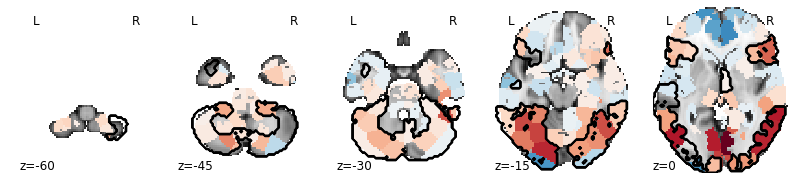

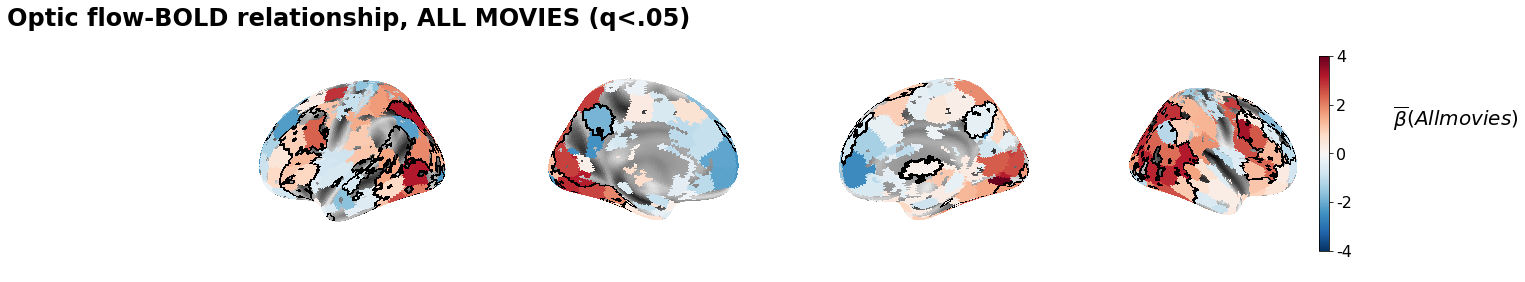

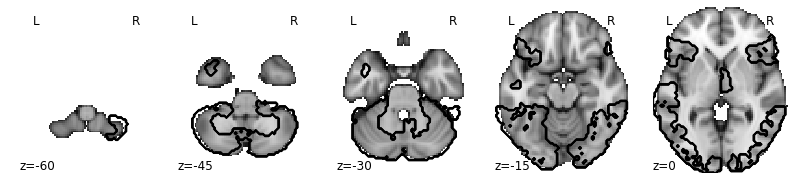

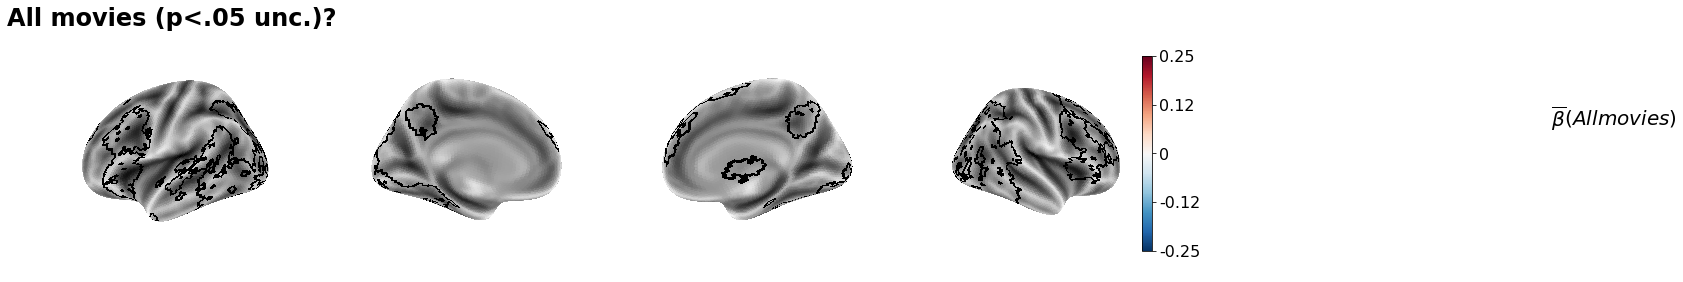

In [382]:
vmin,vmax = -4,4
cmap = 'RdBu_r'
#txt = r' $\overline{\beta}(\""")-$' + '\n' + r'$\overline{\beta}_{Non-social}$'+ '\n'
title_txt = 'Optic flow-BOLD relationship, ALL MOVIES (q<.05)'
#txt = '  'r"$\overline{\beta}{(''Social'')}-$" + '\n  ' + r"$\overline{\beta}{(''Non-social'')}$"
txt = '  'r"$\overline{\beta}{(All movies)}$"
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False)

nodes = np.zeros((268,))
nodes[pval_of_fdr] = coef_of[pval_of_fdr]

params = {'vmin':vmin,'vmax':vmax, 'cmap': cmap, 'title_txt': title_txt, 'txt' :'       'r"$\overline{\beta}{(All movies)}$"}
surfplot_coeffts(nodes, params)


vmin,vmax = -.25,.25
cmap = 'RdBu_r'
#txt = r' $\overline{\beta}(\""")-$' + '\n' + r'$\overline{\beta}_{Non-social}$'+ '\n'
title_txt = 'All movies (p<.05 unc.)?'
#txt = '  'r"$\overline{\beta}{(''Social'')}-$" + '\n  ' + r"$\overline{\beta}{(''Non-social'')}$"
txt = '  'r"$\overline{\beta}{(All movies)}$"
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False)

nodes = np.zeros((268,))
nodes[pval_of_movie<.05] = coef_of_movie[pval_of_movie<.05]

params = {'vmin':vmin,'vmax':vmax, 'cmap': cmap, 'title_txt': title_txt, 'txt' :'  'r"$\overline{\beta}{(All movies)}$"}
surfplot_coeffts(nodes, params)


In [383]:
min(mean_of_coaxbill),max(mean_of_coaxbill)

(-0.796771938540757, 1.119731417603763)

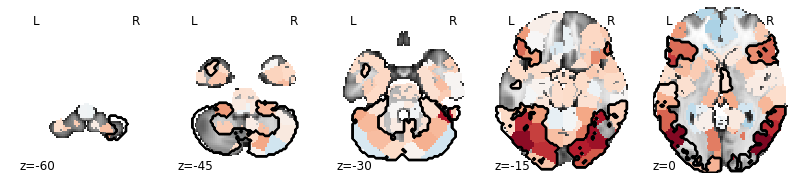

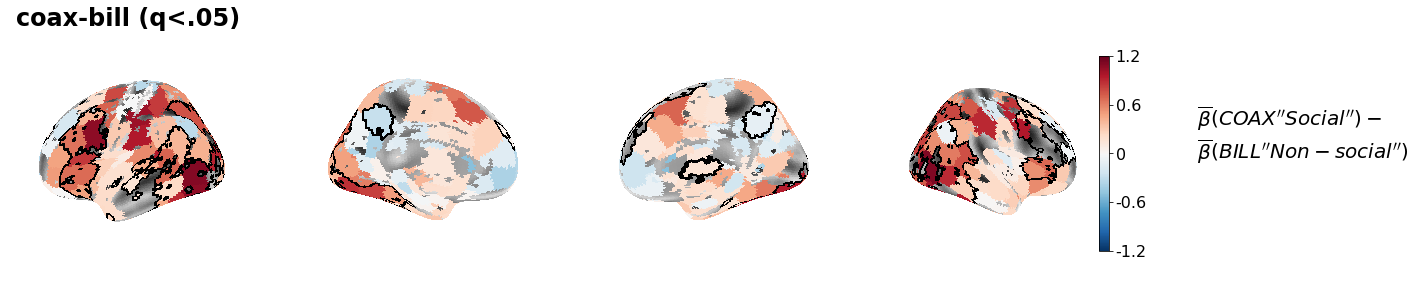

In [384]:
vmin,vmax = -1.2,1.2
cmap = 'RdBu_r'
#txt = r' $\overline{\beta}(\""")-$' + '\n' + r'$\overline{\beta}_{Non-social}$'+ '\n'
title_txt = 'coax-bill (q<.05)'
txt = '  'r"$\overline{\beta}{(COAX''Social'')}-$" + '\n  ' + r"$\overline{\beta}{(BILL''Non-social'')}$"
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False)

nodes = np.zeros((268,))
nodes[pval_of_coaxbill_fdr] = mean_of_coaxbill[pval_of_coaxbill_fdr]

params = {'vmin':vmin,'vmax':vmax, 'cmap': cmap, 'title_txt': title_txt, 'txt' : txt}
surfplot_coeffts(nodes, params)


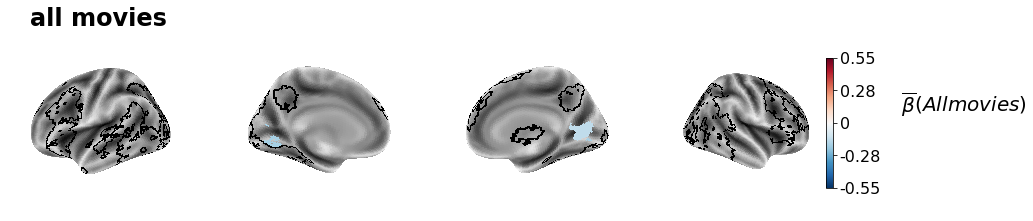

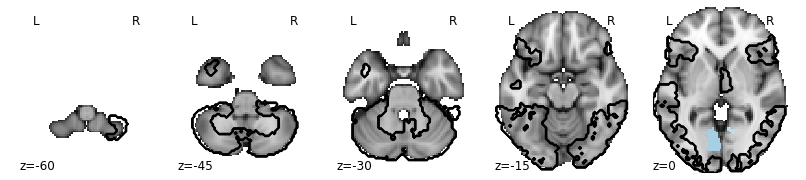

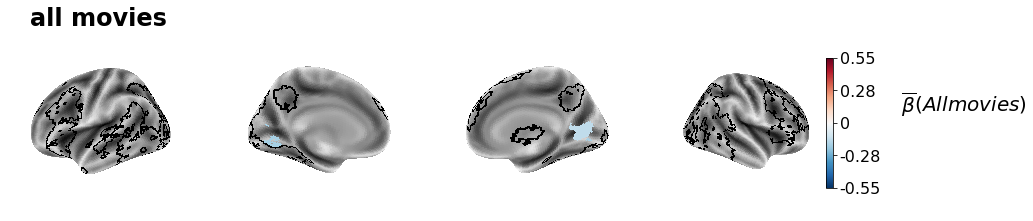

In [148]:
vmin,vmax = -.55,.55
cmap = 'RdBu_r'
#txt = r' $\overline{\beta}(\""")-$' + '\n' + r'$\overline{\beta}_{Non-social}$'+ '\n'
title_txt = 'all movies'
#txt = '  'r"$\overline{\beta}{(''Social'')}-$" + '\n  ' + r"$\overline{\beta}{(''Non-social'')}$"
txt = '  'r"$\overline{\beta}{(All movies)}$"
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False)

nodes = np.zeros((268,))
nodes[pval_of_movie<.05] = coef_of[pval_of_movie<.05]

img = roi_to_brain(pd.Series(nodes), mask_x)
#coords = [-50,-40,-30,-20,-10,0,10,25,40,50,60] # initial exploration
coords = [-60,-45,-30,-15,0] # initial exploration
ax_plot = plot_img(img.to_nifti(), display_mode = 'z',vmin = vmin, vmax = vmax, cut_coords =coords,cmap = cmap, bg_img = bg_img,colorbar= False,threshold = .0001)
#ax_plot.title(title_txt,fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot._colorbar_ax.text(1,.8*vmax,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles ='-',filled=False)
#plt.savefig(os.path.join(fig_save_loc,f'RAND/axial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


fig,ax = plt.subplots(nrows=1, ncols= 4,figsize=(15,4),subplot_kw={'projection': '3d'})

#LH
texture = vol_to_surf(color_rois(nodes), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
surf_plot1=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_left,axes=ax[0])#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
#surf_plot1.axes[1].text(4,.8*vmax,s= txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
surf_plot1.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
texture_contour = vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
plot_surf_contours(fsaverage.infl_left, texture_contour, axes=ax[0],figure=surf_plot1, legend=True,levels = [1], colors=['k'])
#plt.savefig(os.path.join(fig_save_loc,f'RAND/surf_left_lat.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

surf_plot2=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_left, view = 'medial',axes=ax[1])#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
#surf_plot2.axes[1].text(4,.8*vmax,s= txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
#surf_plot2.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
plot_surf_contours(fsaverage.infl_left, texture_contour, axes=ax[1],figure=surf_plot2, legend=True,levels = [1], colors=['k'])
#plt.savefig(os.path.join(fig_save_loc,f'RAND/surf_left_med.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

#RH
texture = vol_to_surf(color_rois(nodes), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
surf_plot3=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=True,symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_right,axes=ax[3])#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
#surf_plot3.axes[1].text(4,.8*vmax,s=txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
#surf_plot3.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
texture_contour = vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
plot_surf_contours(fsaverage.infl_right, texture_contour, axes=ax[3],figure=surf_plot3, legend=True,levels = [1], colors=['k'])
surf_plot3.axes[4].text(10,.5*vmax,s=txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
#plt.savefig(os.path.join(fig_save_loc,f'RAND/surf_right_lat.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

surf_plot4=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=False,symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_right, view ='medial',axes=ax[2])#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
#surf_plot4.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
plot_surf_contours(fsaverage.infl_right, texture_contour, axes=ax[2],figure=surf_plot4, legend=True, levels = [1], colors=['k'])#, labels=['Sig. (q<.05) across\n(a),(c),(d)'])
#plt.savefig(os.path.join(fig_save_loc,f'RAND/surf_right_med.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

#plt.savefig(os.path.join(fig_save_loc,f'RAND/surf_all4.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')
